### Background and Context

You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

The company in the last campaign contacted the customers at random without looking at the available information. However, this time company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being, and wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

You as a Data Scientist at "Visit with us" travel company has to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

### Objective

To predict which customer is more likely to purchase the newly introduced travel package.

### Data Dictionary

#### Customer details:

   - CustomerID: Unique customer ID
   - ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
   - Age: Age of customer
   - TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
   - CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
   - Occupation: Occupation of customer
   - Gender: Gender of customer
   - NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
   - PreferredPropertyStar: Preferred hotel property rating by customer
   - MaritalStatus: Marital status of customer
   - NumberOfTrips: Average number of trips in a year by customer
   - Passport: The customer has a passport or not (0: No, 1: Yes)
   - OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
   - NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
   - Designation: Designation of the customer in the current organization
   - MonthlyIncome: Gross monthly income of the customer

#### Customer interaction data: 

- PitchSatisfactionScore: Sales pitch satisfaction score
- ProductPitched: Product pitched by the salesperson
- NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
- DurationOfPitch: Duration of the pitch by a salesperson to the customer

### Import Libraries

In [1]:
%load_ext nb_black
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

%matplotlib inline
import warnings

warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

# To install xgboost library use - !pip install xgboost
from xgboost import XGBClassifier

<IPython.core.display.Javascript object>

#### Loading the Dataset

In [2]:
tourism = pd.read_excel("Tourism.xlsx", sheet_name=1)

tourism.sample(5)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
3361,203361,0,35.0,Self Enquiry,3,9.0,Small Business,Female,3,4.0,Deluxe,5.0,Unmarried,2.0,1,3,1,1.0,Manager,23216.0
3647,203647,0,54.0,Self Enquiry,1,31.0,Small Business,Male,3,2.0,Standard,3.0,Married,5.0,0,3,0,2.0,Senior Manager,25683.0
1234,201234,0,47.0,Company Invited,3,8.0,Small Business,Male,2,NaN,Deluxe,4.0,Married,1.0,0,1,0,1.0,Manager,19978.0
3604,203604,0,46.0,Self Enquiry,1,9.0,Salaried,Female,3,5.0,Deluxe,3.0,Married,3.0,0,4,1,2.0,Manager,24448.0
323,200323,1,NaN,Self Enquiry,1,8.0,Small Business,Male,2,5.0,Basic,3.0,Divorced,6.0,1,3,1,0.0,Executive,18464.0


<IPython.core.display.Javascript object>

### EDA

In [3]:
df = tourism.copy()

df.shape

(4888, 20)

<IPython.core.display.Javascript object>

In [4]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

<IPython.core.display.Javascript object>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

<IPython.core.display.Javascript object>

- There are some missing values in columns such as Age, TypeofContact, DurationOfPitch, NumberOfFollowups, PreferredPropertyStar, NumberOfTrips, NumberOfChildrenVisiting, and MonthlyIncome.
- ProdTaken, CityTier, Passport, OwnCar are of data type int64, while it is best represented as a boolean or categorical data type.
- Gender, ProductPitched, MaritalStatus are string object types while they are best represented as categorical data types.
- More columns might be tranformed at a later point after more data analysis.

In [6]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

<IPython.core.display.Javascript object>

- The code above confirms the columns with the most missing values, and gives the number of missing values too.
- Duration of pitch has the most missing values, 251, which accounts for ~ 0.05 % of the data. The missing values will be dealt with accordingly after establishing the nature of the missing values.

In [7]:
df[df.DurationOfPitch.isnull()]

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
46,200046,0,34.0,Company Invited,3,NaN,Small Business,Male,3,3.0,Deluxe,3.0,Single,1.0,0,5,1,1.0,Manager,19568.0
75,200075,0,31.0,Self Enquiry,1,NaN,Salaried,Female,3,3.0,Deluxe,3.0,Single,2.0,0,5,0,1.0,Manager,NaN
76,200076,0,35.0,Self Enquiry,3,NaN,Small Business,Male,2,4.0,Deluxe,5.0,Single,1.0,0,2,0,1.0,Manager,NaN
84,200084,0,34.0,Self Enquiry,1,NaN,Small Business,Male,3,3.0,Deluxe,4.0,Divorced,2.0,0,5,0,0.0,Manager,NaN
103,200103,0,34.0,Self Enquiry,1,NaN,Salaried,Female,2,3.0,Deluxe,3.0,Single,2.0,0,3,1,0.0,Manager,19809.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4215,204215,0,19.0,Self Enquiry,3,NaN,Small Business,Female,4,5.0,Basic,3.0,Single,3.0,0,1,0,3.0,Executive,19878.0
4427,204427,1,21.0,Self Enquiry,1,NaN,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,1,5,1,2.0,Executive,19687.0
4641,204641,0,19.0,Company Invited,1,NaN,Salaried,Male,4,4.0,Basic,3.0,Single,3.0,0,1,0,2.0,Executive,19729.0
4678,204678,0,29.0,Self Enquiry,3,NaN,Small Business,Male,4,4.0,Basic,4.0,Married,3.0,0,5,0,3.0,Executive,19730.0


<IPython.core.display.Javascript object>

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


<IPython.core.display.Javascript object>

- CustomerID doesn't offer much information other than how to identify the customer, so it can be dropped/ignored from the analysis.
- The categorical variables wrongly classified as integers do not also represent a clear picture of their summary.
- It appears there might be some outliers in the dataset. For instance, DurationOfPitch has a mean of ~15, a minimum of 5 and a maximum of 127. NumberOfTrips too has might have outliers. It has a mean of ~3, a minimum of 1 and a maximum of 22. Monthly income too has some outliers. The outliers will be investigated at a later point in the analysis.

In [9]:
df.describe(include="object").T

,count,unique,top,freq
TypeofContact,4863,2,Self Enquiry,3444
Occupation,4888,4,Salaried,2368
Gender,4888,3,Male,2916
ProductPitched,4888,5,Basic,1842
MaritalStatus,4888,4,Married,2340
Designation,4888,5,Executive,1842


<IPython.core.display.Javascript object>

- Type of contact has 2 levels and the most frequent type is Self Enquiry with a frquency of 3444.
- Occupation has 4 levels and the most frequent type of Salaried with a frequency of 2368.
- Gender has 3 levels and the most frequent selection is Male with a frequency of 2916. This seems a little bit off. More analysis is required.
- ProductPitched has 5 levels and the most frequent product is Basic with a frequency of 1842.
- MaritalStatus has 4 levels and the most frequent status is Married with a frequency of 2340.
- Designmation has 5 levels and the most frequent designation is Executive with a frequency of 1842.


Before further analysis, it is better to have all the columns in their right datatype designation.

In [10]:
# Making sure that the object columns are rightly identified as categorical.
for feature in df.columns:
    if df[feature].dtype == "object":
        df[feature] = pd.Categorical(df[feature])

<IPython.core.display.Javascript object>

In [11]:
# Changing the previously wrongly classified categorical columns into categorical.
df["ProdTaken"] = df["ProdTaken"].astype("category")
df["CityTier"] = df["CityTier"].astype("category")
df["MaritalStatus"] = df["MaritalStatus"].astype("category")
df["Passport"] = df["Passport"].astype("category")
df["OwnCar"] = df["OwnCar"].astype("category")

<IPython.core.display.Javascript object>

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CustomerID                4888 non-null   int64   
 1   ProdTaken                 4888 non-null   category
 2   Age                       4662 non-null   float64 
 3   TypeofContact             4863 non-null   category
 4   CityTier                  4888 non-null   category
 5   DurationOfPitch           4637 non-null   float64 
 6   Occupation                4888 non-null   category
 7   Gender                    4888 non-null   category
 8   NumberOfPersonVisiting    4888 non-null   int64   
 9   NumberOfFollowups         4843 non-null   float64 
 10  ProductPitched            4888 non-null   category
 11  PreferredPropertyStar     4862 non-null   float64 
 12  MaritalStatus             4888 non-null   category
 13  NumberOfTrips             4748 non-null   float6

<IPython.core.display.Javascript object>

#### Checking the unique values in the categorical columns.

- Understandably, the integer and float datatype columns will have many entries, so they are left out in this part. One can check the number of unique values with the commented code below.

In [13]:
# df.nunique()

<IPython.core.display.Javascript object>

In [14]:
catcol = df.describe(include="category").columns
for i in catcol:
    print("Unique values in", i, "are :")
    print(df[i].value_counts())
    print("*" * 50)

Unique values in ProdTaken are :
0    3968
1     920
Name: ProdTaken, dtype: int64
**************************************************
Unique values in TypeofContact are :
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
**************************************************
Unique values in CityTier are :
1    3190
3    1500
2     198
Name: CityTier, dtype: int64
**************************************************
Unique values in Occupation are :
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
**************************************************
Unique values in Gender are :
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
**************************************************
Unique values in ProductPitched are :
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
************

<IPython.core.display.Javascript object>

- The unique values help one understand the data and customers a little bit better. For instance
        i) ProdTaken indicate that there are considerably more failed purchases, 3968, than successful one, 920. The business would benefit from identifying the underlying cause.
        ii) Despite the few sales, TypeOfContact reveals that the customers reached out more, 3444, than they were invited, 1419. This could be an indication that there is a general interest in the companies products. This should be capitalized on.
        iii) CityTier illustrates that there is a clear divide between the socio-economic backgrounds of the customers. Tier 1 and Tier 3 are on the different ends of the spectrum. The company could benefit from tailoring products to the specific demographics.
        iv) Interestingly, of all the customers, only 2 are free lancers. This could be an anomaly.
        v) Initially, Gender had 3 levels, but it appears the third level was a data entry issue for female. This will be handled in subsequent sections.
        vi) Majority of the customers do not have passports. This could be indicate that they are only interested in local/regional travel. 
        vii) The point above could be backed by the fact that majority of the customers own cars.
        viii) Designation reveals that the customers are senior ranking officials in their respective companies. They could have more money at their disposal. 
        
        
The information above could be summarized as shown below.

In [15]:
df.describe(include="category").T

,count,unique,top,freq
ProdTaken,4888,2,0,3968
TypeofContact,4863,2,Self Enquiry,3444
CityTier,4888,3,1,3190
Occupation,4888,4,Salaried,2368
Gender,4888,3,Male,2916
ProductPitched,4888,5,Basic,1842
MaritalStatus,4888,4,Married,2340
Passport,4888,2,0,3466
OwnCar,4888,2,1,3032
Designation,4888,5,Executive,1842


<IPython.core.display.Javascript object>

In [16]:
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

- It appears there are no duplicates. The next step is to visualize some of the observations noted above.


### Visualizations

### Univeriate Analysis

In [17]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

#### Observations on Age

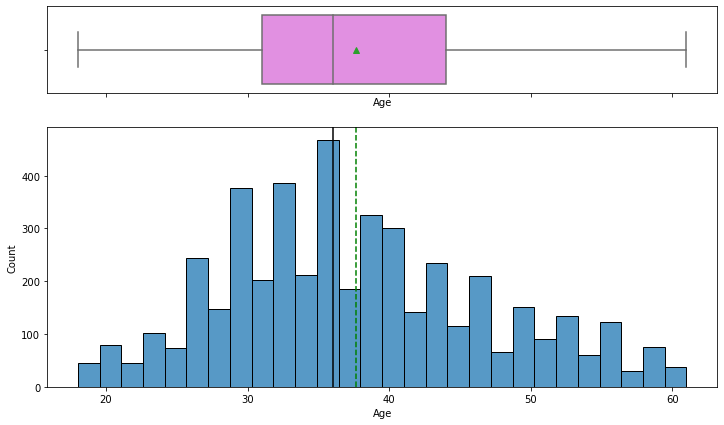

<IPython.core.display.Javascript object>

In [18]:
histogram_boxplot(df, "Age")

- There is a slight skew to the rightin the Age data.
- However, there are not outliers.

#### Observations on MonthlyIncome

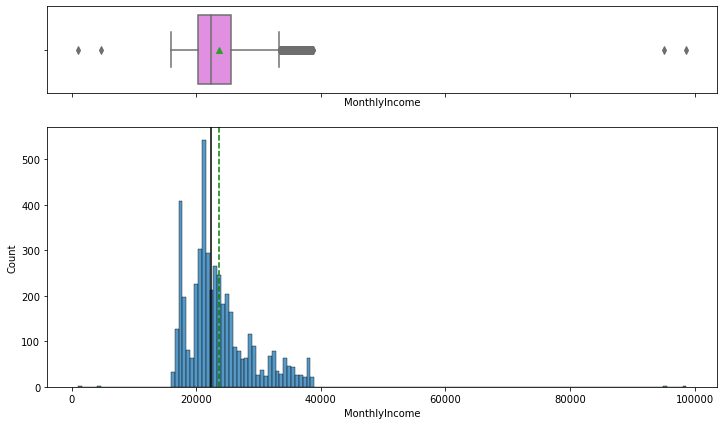

<IPython.core.display.Javascript object>

In [19]:
histogram_boxplot(df, "MonthlyIncome")

- MontjlyIncome column is skewed to the right.
- There are outliers in the upper and lower limits. These will be dealt with accordingly.

#### Observations on DurationOfPitch

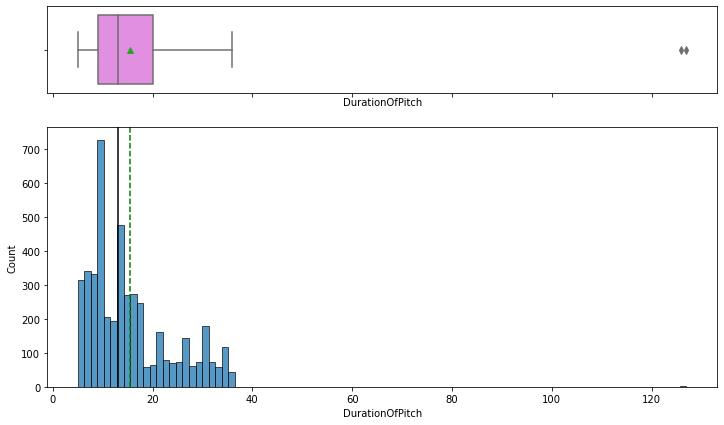

<IPython.core.display.Javascript object>

In [20]:
histogram_boxplot(df, "DurationOfPitch")

- Duration of Pitch is skewed to the right too.
- There are outliers in the upper limits. They will be treated accordingly.

#### Observations on NumberOfTrips

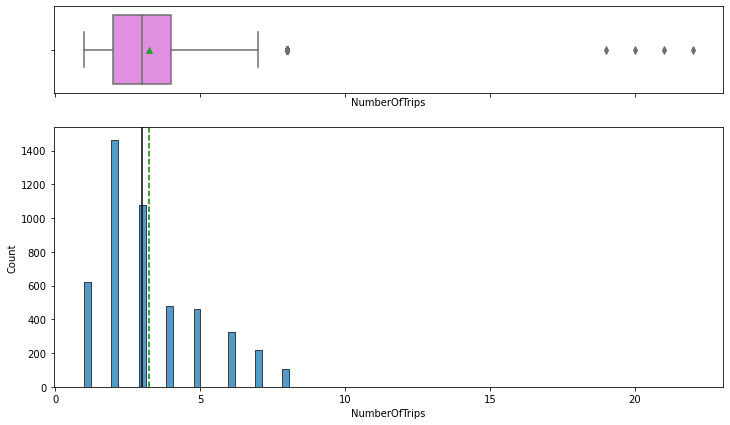

<IPython.core.display.Javascript object>

In [21]:
histogram_boxplot(df, "NumberOfTrips")

- There are outliers in the upper limits of the NumberOfTrips column.
- Consequently, the data is skewed to the right.

In [22]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

#### Observations on ProdTaken

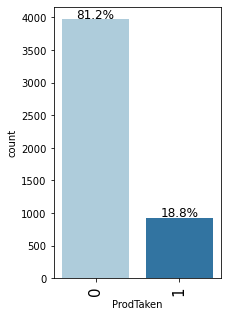

<IPython.core.display.Javascript object>

In [23]:
labeled_barplot(df, "ProdTaken", perc=True)

- 81.2 % of the customers did not purchase any of the packages. The company needs to investigate the reason for that. 

#### Observations on TypeofContact

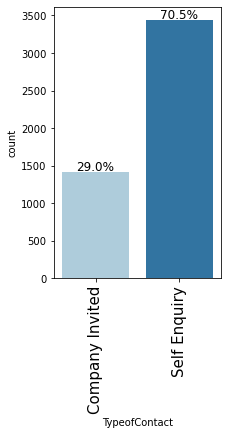

<IPython.core.display.Javascript object>

In [24]:
labeled_barplot(df, "TypeofContact", perc=True)

- 70.5% of the visiting customers were curious about the company's products. This is an opportunity for sale conversion. Only 29% were company invited.

#### Observations on CityTier

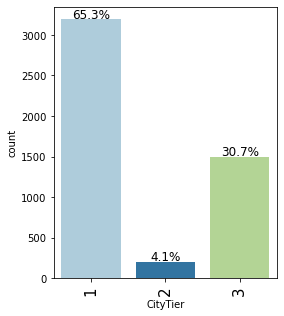

<IPython.core.display.Javascript object>

In [25]:
labeled_barplot(df, "CityTier", perc=True)

- A clear divide is observed between the top tier and the bottom tier. Only 4.1% of the customers were from tier 2. The company can benefit from introducing packages that are suited for tier 2, while tailoring the existing packages for tier 1 and 3.

#### Observations on Occupation

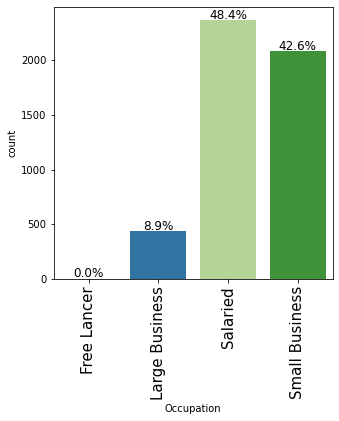

<IPython.core.display.Javascript object>

In [26]:
labeled_barplot(df, "Occupation", perc=True)

- At 48.4% Salaried customers are the majority, followed by customers in small business at 42.6%. 
- Customers involved in large business account for only 8.9%. This seems like a lost opportunity by the company.
- Free Lancers account for the smallest percentage of the customers. 

#### Observations on Gender

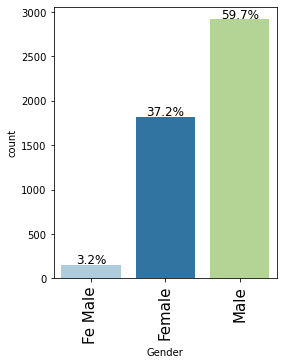

<IPython.core.display.Javascript object>

In [27]:
labeled_barplot(df, "Gender", perc=True)

- There sre more male customers than female customers at 59.7%. 
- Fe Male is a data entry problem and it accounts for 3.2% of the total gender data entry. Even when this figurer is added to female, the male population is larger.

#### Observations on NumberOfPersonVisiting

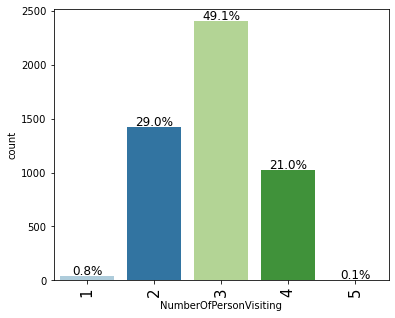

<IPython.core.display.Javascript object>

In [28]:
labeled_barplot(df, "NumberOfPersonVisiting", perc=True)

- The plot reveals that most of the customers visiting visit in 3s. This could be indicative of the customers being families. If so, the company needs to tailor their packages to families.
- On the second position are people visiting in 2s with 29%. Maybe these individuals are couples. 
- It is also important to note that are considerably fewer customers visiting the company alone or in large groups (>=5)

#### Observations on NumberOfChildrenVisiting

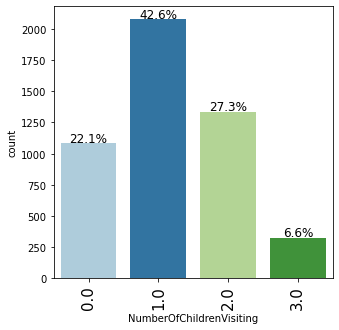

<IPython.core.display.Javascript object>

In [29]:
labeled_barplot(df, "NumberOfChildrenVisiting", perc=True)

- The results of this plot could be used as justification of the observations made above with the number of person visiting. 
- Of the customers visiting 42.6% of the total number have 1 child visiting with them. That could be a justification why most of the customers visiting the company came in 3s.
- Additionally, 22.1% of the customers had no child visiting with them, while 27.3% had 2 children visiting. If the latter means that the parents or guardians were not present, then those figures could be indicate that the visitors were either couples, or teenagers. If that's the case, then the company could tailor their products accordingly. 
- More analysis is required to make firmer claims about these observations.

#### Observations on NumberOfFollowups

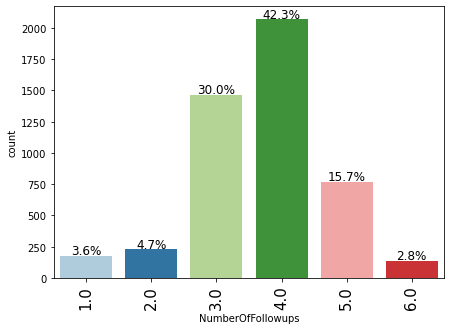

<IPython.core.display.Javascript object>

In [30]:
labeled_barplot(df, "NumberOfFollowups", perc=True)

- The graph illustrates that majority of the salespeople did either 3 (30%) or 4(42.3%) follow-ups after making a pitch. This could be an area for improvement, such that it takes less follow-ups after a sales pitch. 
- if the pitch is effective and convincing the first time, maybe conversion rates might increase.

#### Observations on ProductPitched

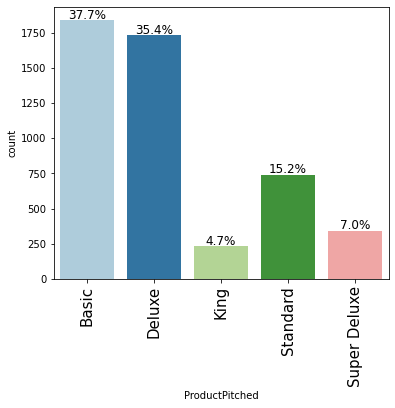

<IPython.core.display.Javascript object>

In [31]:
labeled_barplot(df, "ProductPitched", perc=True)

- The basic and Deluxe packages are the popular packages presented to the customers at 37.7% and 35.4% respectively. 
- Super Deluxe and King packages are the least popular at 7% and 4.7% respectively.

#### Observations on PreferredPropertyStar

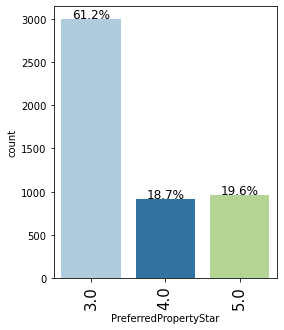

<IPython.core.display.Javascript object>

In [32]:
labeled_barplot(df, "PreferredPropertyStar", perc=True)

- As one would intuitively guess, higher rated properties are more expensive. It is, therefore, understandable that most of the customers (61.2%) preferred average rated properties.
- Interestingly, properties rated 4 and 5 had close preference at 18.7% and 19.6% respectively.

#### Observations on MaritalStatus

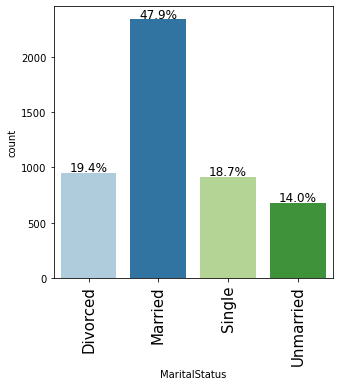

<IPython.core.display.Javascript object>

In [33]:
labeled_barplot(df, "MaritalStatus", perc=True)

- 47.9% of the customers visiting the company are married.
- Divorced and Single customers account for almost the same number of customers with 19.4% and 18.7% respectively.

#### Observations on Passport

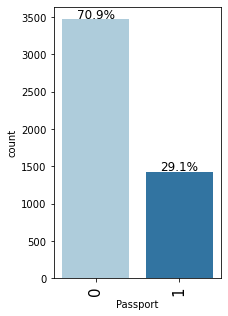

<IPython.core.display.Javascript object>

In [34]:
labeled_barplot(df, "Passport", perc=True)

- 70.9% of the customers do not have passports. This could be indicative that they are more interested in local/regional travel. The packages available should be made attractive for such clientele.

#### Observations on PitchSatisfactionScore

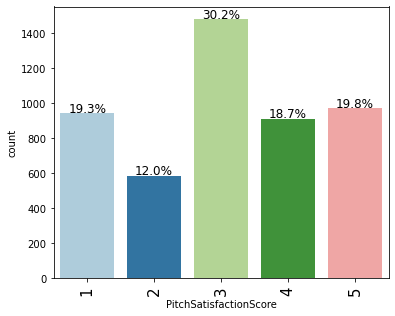

<IPython.core.display.Javascript object>

In [35]:
labeled_barplot(df, "PitchSatisfactionScore", perc=True)

- The results from the satisfaction score reveal an average satisfaction with the product pitches. 
- Interestingly, however, 19.3% of the customers were dissatisfied with the pitches. With a score of 2, 12% of the customers were also dissatisfied. The combined figure for these scores should be lowered even further for the company to convert more customers.

#### Observations on OwnCar

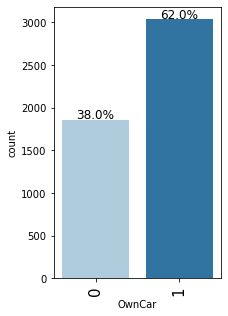

<IPython.core.display.Javascript object>

In [36]:
labeled_barplot(df, "OwnCar", perc=True)

- 62% of the customers own cars. If this is an indication of their love for driving, the company should present packages to these customers where they get to drive and enjoy the outdoors.

#### Observations on Designation

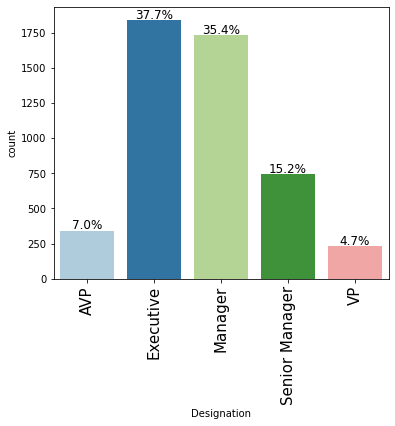

<IPython.core.display.Javascript object>

In [37]:
labeled_barplot(df, "Designation", perc=True)

- Customers with Executive (37.7%) and Manager (35.4%) designations account for a majority of the customers visiting the company.
- AVP (7%) and VP (4.7%) account for the lowest number of customers in the company.

### Bivariate Analysis

#### ProdTaken vs Age

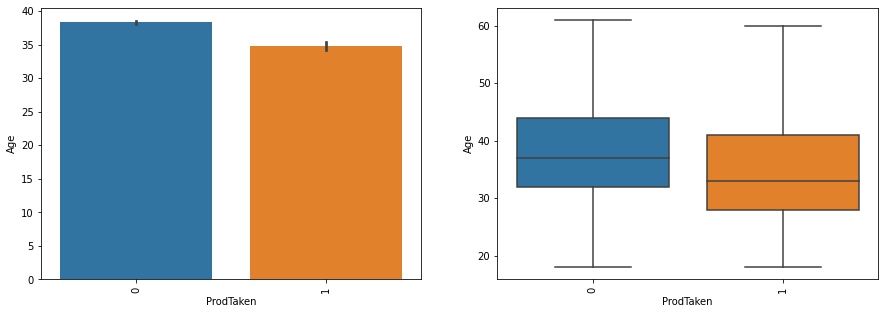

<IPython.core.display.Javascript object>

In [38]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=df, y="Age", x="ProdTaken")
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y="Age", x="ProdTaken")
plt.xticks(rotation=90)

plt.show()

- With a small difference, older customers(mean ~ 37) are less likely signup for the various packages than younger people (~ 35).

#### ProdTaken vs DurationOfPitch

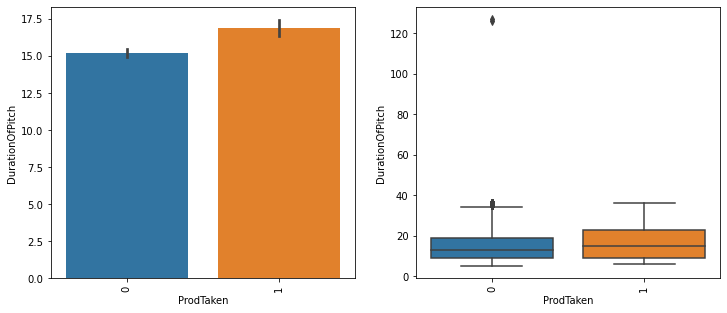

<IPython.core.display.Javascript object>

In [39]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=df, y="DurationOfPitch", x="ProdTaken")
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y="DurationOfPitch", x="ProdTaken")
plt.xticks(rotation=90)

plt.show()

- The longer the sales pitch, the more likely the customers is going to signup for a package offered.

#### ProdTaken vs MonthlyIncome

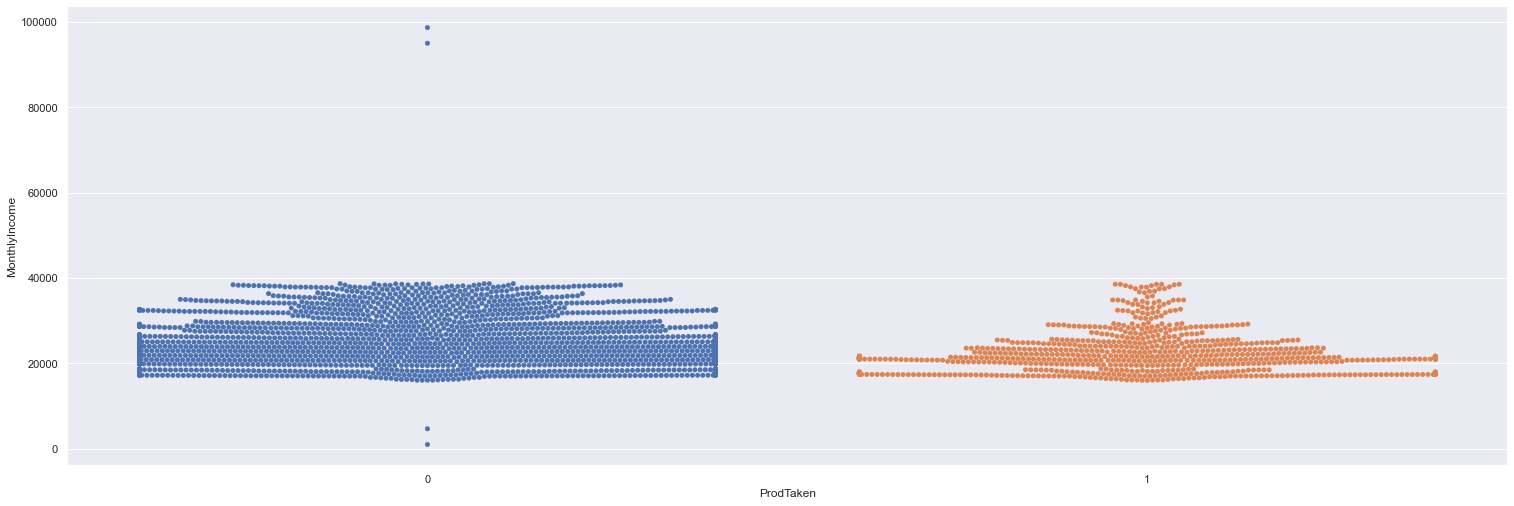

<IPython.core.display.Javascript object>

In [40]:
sns.set(rc={"figure.figsize": (12, 5)})
sns.catplot(x="ProdTaken", y="MonthlyIncome", kind="swarm", data=df, height=7, aspect=3)

- Customers with higher monthly income did not take the packages offered.

In [41]:
## Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set()
    ## crosstab
    tab1 = pd.crosstab(x, df["ProdTaken"], margins=True).sort_values(
        by=True, ascending=False
    )
    print(tab1)
    print("-" * 120)
    ## visualising the cross tab
    tab = pd.crosstab(x, df["ProdTaken"], normalize="index").sort_values(
        by=1, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(15, 7))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

#### ProdTaken vs NumberOfPersonVisiting

ProdTaken                  0    1   All
NumberOfPersonVisiting                 
All                     3968  920  4888
3                       1942  460  2402
2                       1151  267  1418
4                        833  193  1026
1                         39    0    39
5                          3    0     3
------------------------------------------------------------------------------------------------------------------------


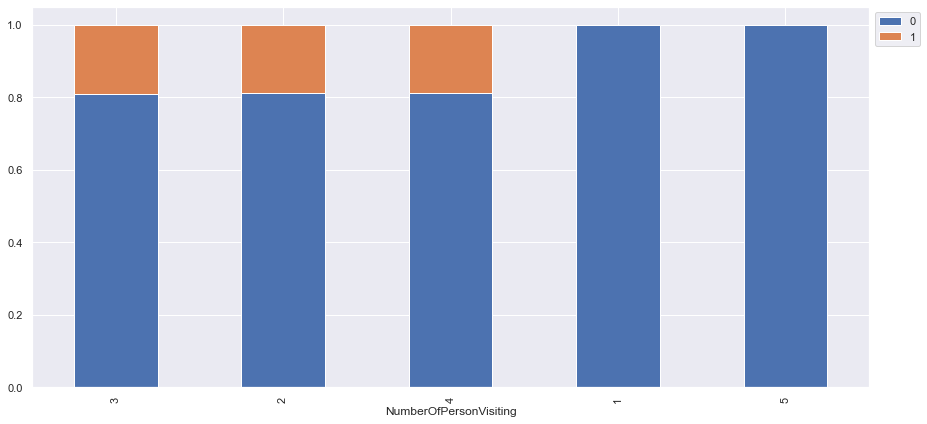

<IPython.core.display.Javascript object>

In [42]:
stacked_plot(df.NumberOfPersonVisiting)

- The plot illustrates that few to no sales are made when the number of visiting customers is either 1 or 5. This could be an indication that the products offered are not suitable to either of them. Maybe it's a pricing issue?!

#### ProdTaken vs NumberOfFollowups

ProdTaken             0    1   All
NumberOfFollowups                 
All                3931  912  4843
4.0                1689  379  2068
3.0                1222  244  1466
5.0                 577  191   768
6.0                  82   54   136
2.0                 205   24   229
1.0                 156   20   176
------------------------------------------------------------------------------------------------------------------------


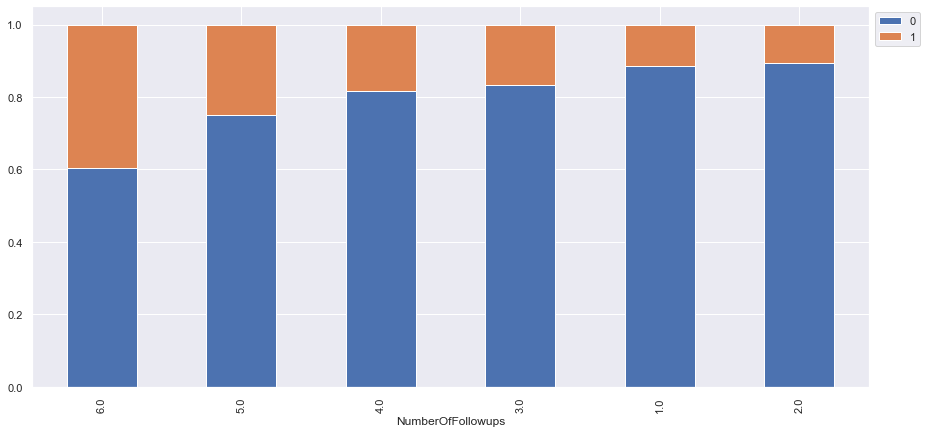

<IPython.core.display.Javascript object>

In [43]:
stacked_plot(df.NumberOfFollowups)

- The plot indicates that the more the number of follow-ups, the more likely the customer is going to purchase a package.

#### ProdTaken vs TypeofContact

ProdTaken           0    1   All
TypeofContact                   
All              3946  917  4863
Self Enquiry     2837  607  3444
Company Invited  1109  310  1419
------------------------------------------------------------------------------------------------------------------------


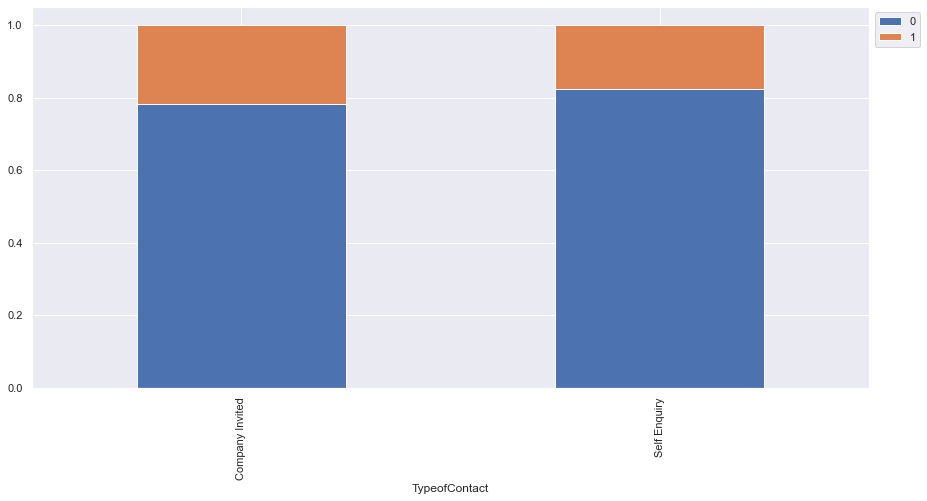

<IPython.core.display.Javascript object>

In [44]:
stacked_plot(df.TypeofContact)

- It seems like more sale conversions are made when the company reaches out to the customers. The company should capitalize on this.

#### ProdTaken vs CityTier

ProdTaken     0    1   All
CityTier                  
All        3968  920  4888
1          2670  520  3190
3          1146  354  1500
2           152   46   198
------------------------------------------------------------------------------------------------------------------------


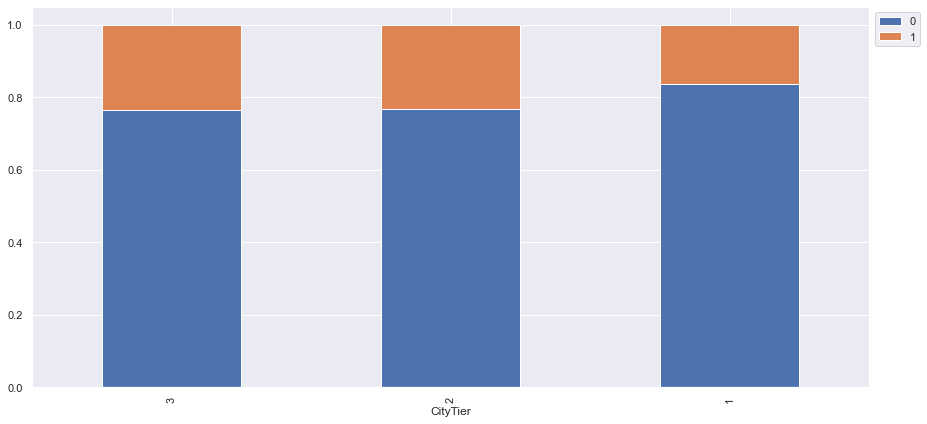

<IPython.core.display.Javascript object>

In [45]:
stacked_plot(df.CityTier)

- More customers from tier 3 made purchases than those in tier 2, who made more purchases than those in tier 1.

#### ProdTaken vs PreferredPropertyStar vs NumberOfTrips vs PitchSatisfactionScore vs NumberOfChildrenVisiting

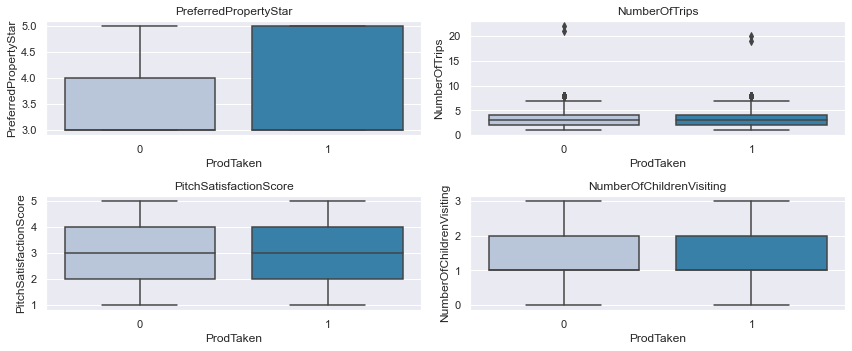

<IPython.core.display.Javascript object>

In [46]:
cols = df[
    [
        "PreferredPropertyStar",
        "NumberOfTrips",
        "PitchSatisfactionScore",
        "NumberOfChildrenVisiting",
    ]
].columns.tolist()
plt.figure(figsize=(12, 7))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(df["ProdTaken"], df[variable], palette="PuBu", showfliers=True)
    plt.tight_layout()
    plt.title(variable)
plt.show()

- The plots indicate that the higher the property is rated, the more likely the customers will purchase those packages.
- There isn't any observable difference in the number of trips made, pitch satisfaction score, or the number of children visiting and their likelihood to signup for a package or not. If so, the company can divert it resources to areas that contribute more to making sales.

#### Column Correlations

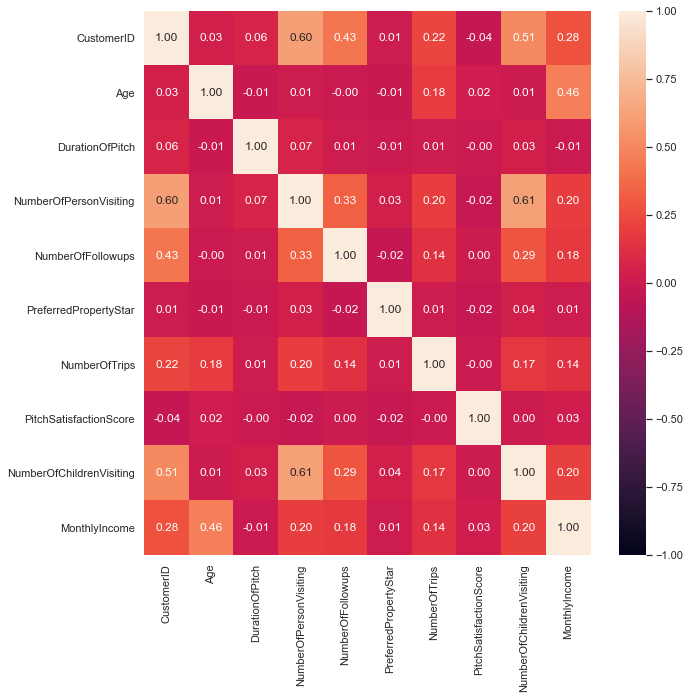

<IPython.core.display.Javascript object>

In [47]:
plt.figure(figsize=(10, 10))
sns.heatmap(data=df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f")
plt.show()

- Interestingly, there are some variables that have a strong correlation with customer ID, but this observation will be ignored because the ID is only useful for identification purposes.
- There is a strong positive correlation between NumberOfChildrenVisiting and NumberOfPersonVisiting at 0.61.
- Age has a moderate positive correlation with MonthlyIncome at 0.46. 
- Other variables seem to have relatively week correlations with one another.

### Data Pre-Processing

In [48]:
# It was noted earlier that CustomerID is not needed, so it gets dropped.

df.drop("CustomerID", axis=1, inplace=True)
df.sample(2)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
83,0,38.0,Company Invited,1,12.0,Small Business,Female,3,5.0,Deluxe,3.0,Married,1.0,1,2,0,2.0,Manager,20329.0
1862,0,54.0,Self Enquiry,1,11.0,Small Business,Male,2,3.0,King,5.0,Married,5.0,0,4,1,0.0,VP,34406.0


<IPython.core.display.Javascript object>

- It was also noted earlier that there are some missing values in some of the columns. Those will be imputed in the subsequent sections. Mode for the categorical variables, mean for the continous variables.

In [49]:
df.isnull().sum()

ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

<IPython.core.display.Javascript object>

#### Treating Missing Values

In [50]:
print(df["Age"].isnull().sum())
df["Age"].fillna(df["Age"].mean(), inplace=True)  # mean imputation
print(df["Age"].isnull().sum())
print("\n")
print(df["DurationOfPitch"].isnull().sum())
df["DurationOfPitch"].fillna(df["DurationOfPitch"].mean(), inplace=True)  # mean imputation
print(df["DurationOfPitch"].isnull().sum())
print("\n")
print(df["NumberOfFollowups"].isnull().sum())
df["NumberOfFollowups"].fillna(df["NumberOfFollowups"].mean(), inplace=True)  # mean imputation
print(df["NumberOfFollowups"].isnull().sum())
print("\n")
print(df["PreferredPropertyStar"].isnull().sum())
df["PreferredPropertyStar"].fillna(df["PreferredPropertyStar"].mean(), inplace=True)  # mean imputation
print(df["PreferredPropertyStar"].isnull().sum())
print("\n")
print(df["NumberOfTrips"].isnull().sum())
df["NumberOfTrips"].fillna(df["NumberOfTrips"].mean(), inplace=True)  # mean imputation
print(df["NumberOfTrips"].isnull().sum())
print("\n")
print(df["NumberOfChildrenVisiting"].isnull().sum())
df["NumberOfChildrenVisiting"].fillna(df["NumberOfChildrenVisiting"].mean(), inplace=True)  # mean imputation
print(df["NumberOfChildrenVisiting"].isnull().sum())
print("\n")
print(df["MonthlyIncome"].isnull().sum())
df["MonthlyIncome"].fillna(df["MonthlyIncome"].mean(), inplace=True)  # mean imputation
print(df["MonthlyIncome"].isnull().sum())
print("\n")


226
0


251
0


45
0


26
0


140
0


66
0


233
0




<IPython.core.display.Javascript object>

In [51]:
print(df["TypeofContact"].isnull().sum())
df["TypeofContact"].fillna(df["TypeofContact"].value_counts().index[0], inplace=True) #mode imputation
print(df["TypeofContact"].isnull().sum())


25
0


<IPython.core.display.Javascript object>

In [52]:
# Confirming that there are no more missing values

df.isnull().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

<IPython.core.display.Javascript object>

#### Outlier Treatment

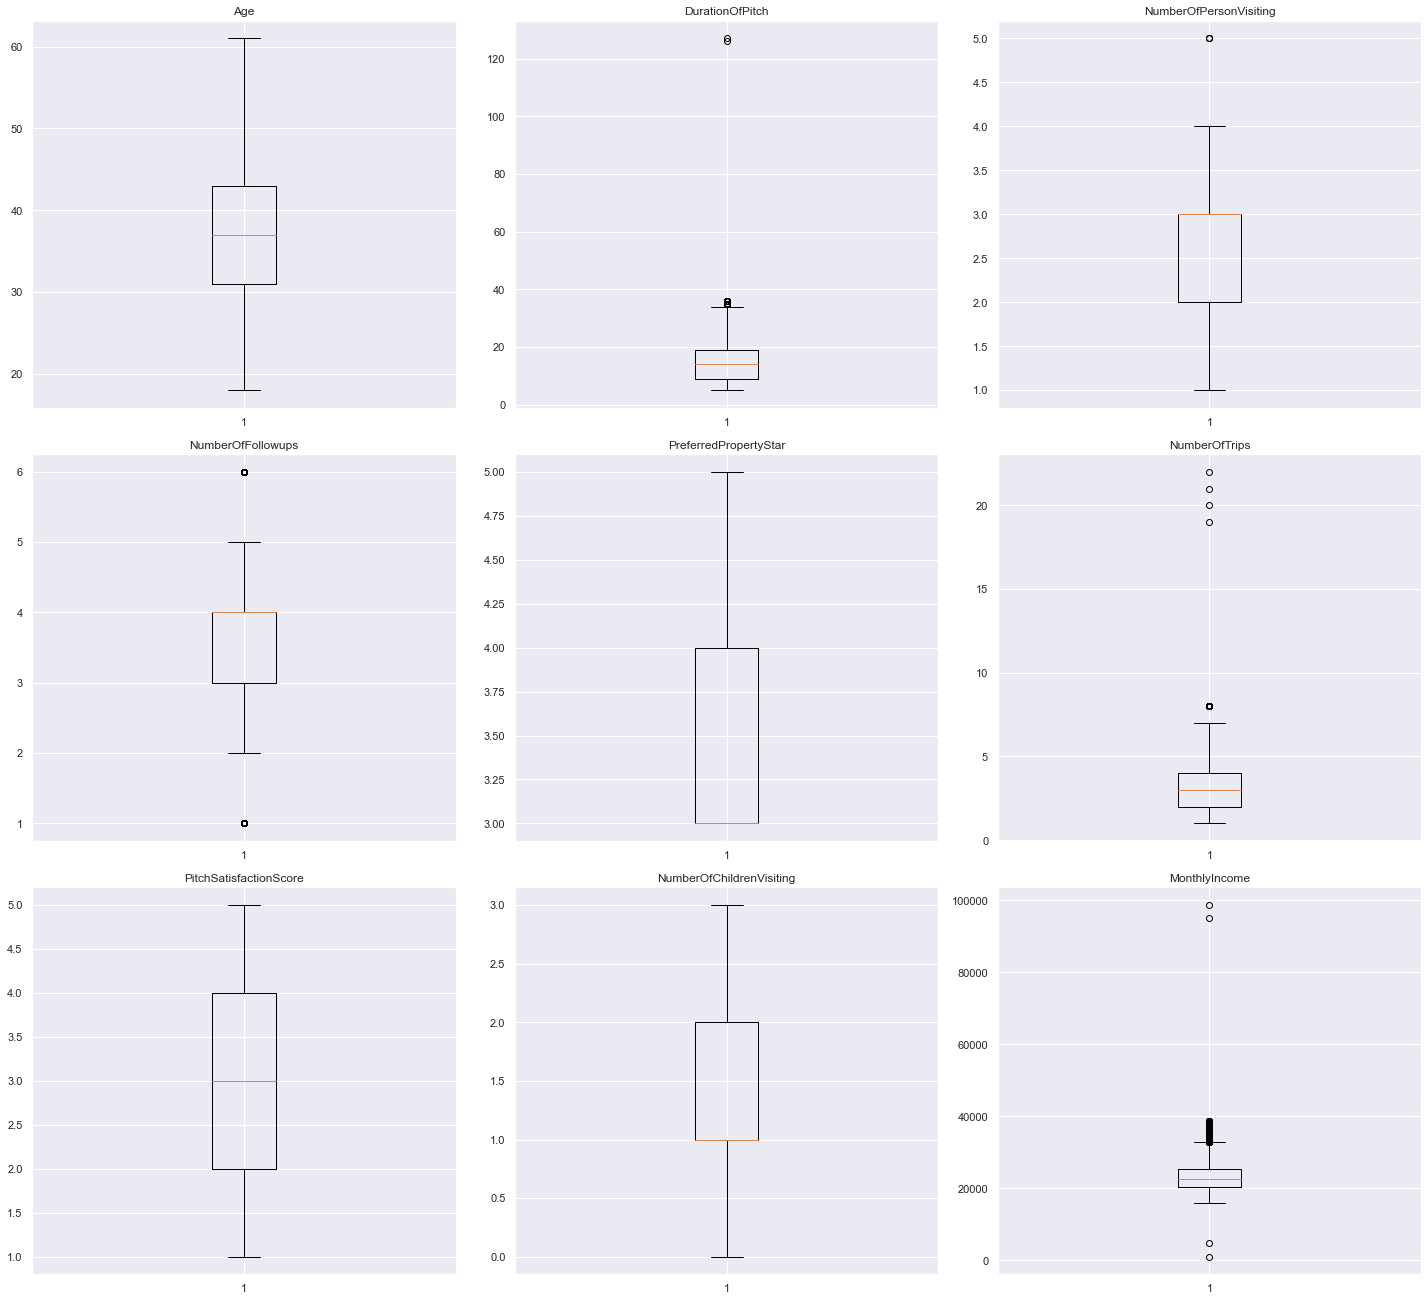

<IPython.core.display.Javascript object>

In [53]:
# let's plot the boxplots of all numeric columns to check for outliers
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 3, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [54]:
# Let's treat outliers by flooring and capping
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: data frame
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

<IPython.core.display.Javascript object>

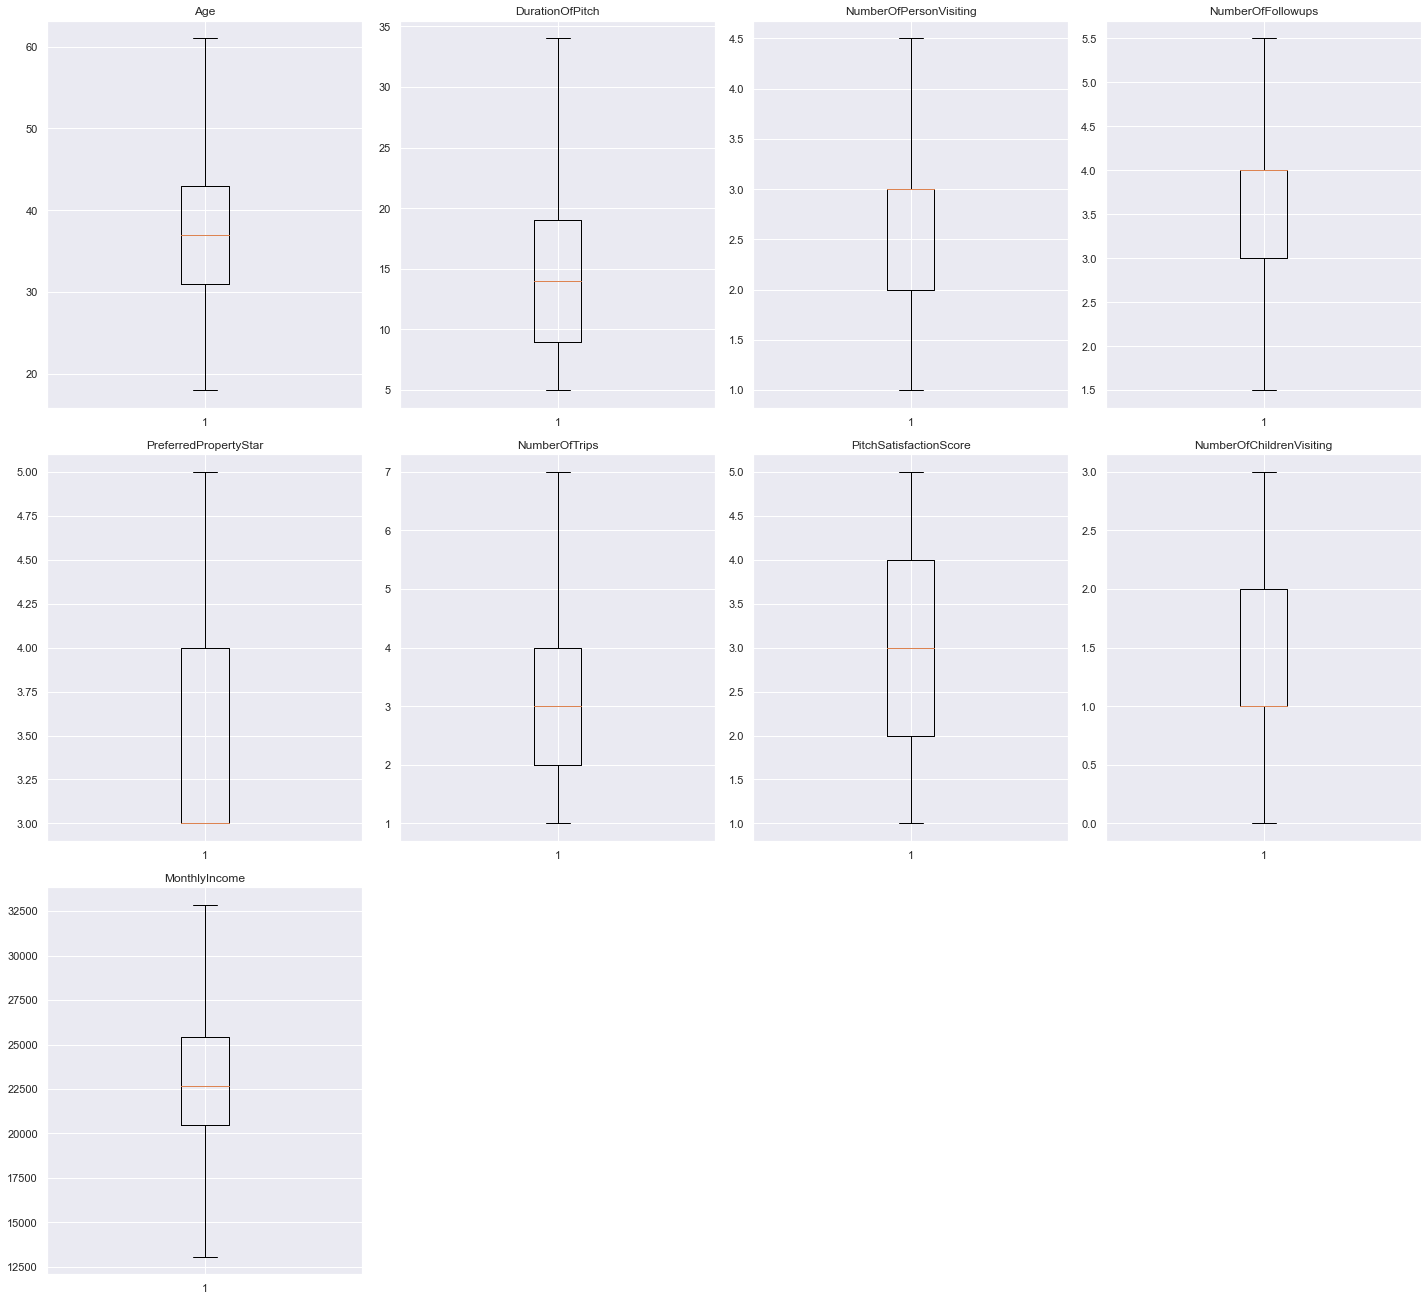

<IPython.core.display.Javascript object>

In [55]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
df = treat_outliers_all(df, numerical_col)

plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- The numerical columns do not have outliers anymore.


#### Feature Engineering
- In the Gender column, there was a data entry issue. That will be handled next.

In [56]:
df.Gender.value_counts()

Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

<IPython.core.display.Javascript object>

In [57]:
df.Gender = df["Gender"].replace("Fe Male", "Female")

df.Gender.value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

<IPython.core.display.Javascript object>

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   category
 1   Age                       4888 non-null   float64 
 2   TypeofContact             4888 non-null   category
 3   CityTier                  4888 non-null   category
 4   DurationOfPitch           4888 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   float64 
 8   NumberOfFollowups         4888 non-null   float64 
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4888 non-null   float64 
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4888 non-null   float64 
 13  Passport                  4888 non-null   catego

<IPython.core.display.Javascript object>

### Data Preparation

In [59]:
pd.set_option(
    "display.max_columns", None
)  # Removes the limit for the number of displayed columns


df2 = pd.get_dummies(
    df,
    drop_first=True,
)

df2.head(3)

,Age,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,PitchSatisfactionScore,NumberOfChildrenVisiting,MonthlyIncome,ProdTaken_1,TypeofContact_Self Enquiry,CityTier_2,CityTier_3,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,Gender_Male,ProductPitched_Deluxe,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Passport_1,OwnCar_1,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,41.0,6.0,3.0,3.0,3.0,1.0,2,0.0,20993.0,1,1,0,1,0,1,0,0,1,0,0,0,0,1,0,1,1,0,1,0,0
1,49.0,14.0,3.0,4.0,4.0,2.0,3,2.0,20130.0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0
2,37.0,8.0,3.0,4.0,3.0,7.0,3,0.0,17090.0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0


<IPython.core.display.Javascript object>

#### Splitting the Dataset

In [60]:
# Separating features and the target column
X = df2.drop("ProdTaken_1", axis=1)
y = df2["ProdTaken_1"]

<IPython.core.display.Javascript object>

In [61]:
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1, shuffle=True
)

<IPython.core.display.Javascript object>

In [62]:
X_train.shape, X_test.shape

((3421, 29), (1467, 29))

<IPython.core.display.Javascript object>

#### Metrics and Functions to be used.

In [63]:
## Function to create confusion matrix
def make_confusion_matrix(model, y_actual, labels=[1, 0]):
    """
    model : classifier to predict values of X
    y_actual : ground truth

    """
    y_predict = model.predict(X_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - No", "Actual - Yes"]],
        columns=[i for i in ["Predicted - No", "Predicted - Yes"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [64]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model, flag=True):
    """
    model : classifier to predict values of X

    """
    # defining an empty list to store train and test results
    score_list = []

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)

    train_recall = metrics.recall_score(y_train, pred_train)
    test_recall = metrics.recall_score(y_test, pred_test)

    train_precision = metrics.precision_score(y_train, pred_train)
    test_precision = metrics.precision_score(y_test, pred_test)

    score_list.extend(
        (
            train_acc,
            test_acc,
            train_recall,
            test_recall,
            train_precision,
            test_precision,
        )
    )

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ", model.score(X_train, y_train))
        print("Accuracy on test set : ", model.score(X_test, y_test))
        print("Recall on training set : ", metrics.recall_score(y_train, pred_train))
        print("Recall on test set : ", metrics.recall_score(y_test, pred_test))
        print(
            "Precision on training set : ", metrics.precision_score(y_train, pred_train)
        )
        print("Precision on test set : ", metrics.precision_score(y_test, pred_test))

    return score_list  # returning the list with train and test scores

<IPython.core.display.Javascript object>

- The company's main aim would be to balance the trade off between losing an opportunity (to gain money through sale of a package) in case of FP and losing the money in case of FN.
- We will assume that a FN is less desireable than a FP, therefore, all the models will **aim to get a good score**.

### Model Building

#### AdaBoost Classifier

In [65]:
ada = AdaBoostClassifier(random_state=1)
ada.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [66]:
ada_score = get_metrics_score(ada)

Accuracy on training set :  0.850336159017831
Accuracy on test set :  0.8289025221540559
Recall on training set :  0.3333333333333333
Recall on test set :  0.2702702702702703
Precision on training set :  0.6842105263157895
Precision on test set :  0.6956521739130435


<IPython.core.display.Javascript object>

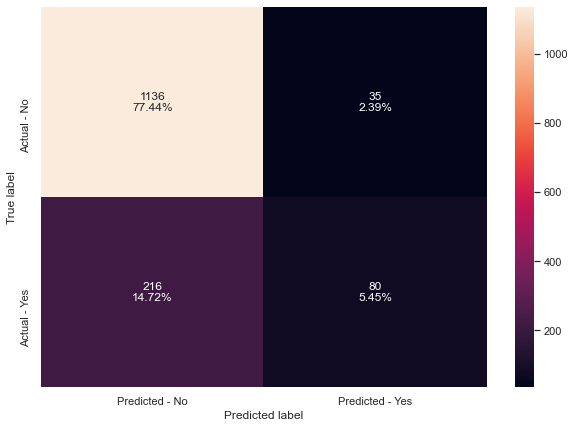

<IPython.core.display.Javascript object>

In [67]:
make_confusion_matrix(ada, y_test)

- The untuned model performs poorly. It is only able to correctly identify the customers that will purchase the packages only 5.45% of the time. 
- This sentiment can also be understood from the low recall scores. 

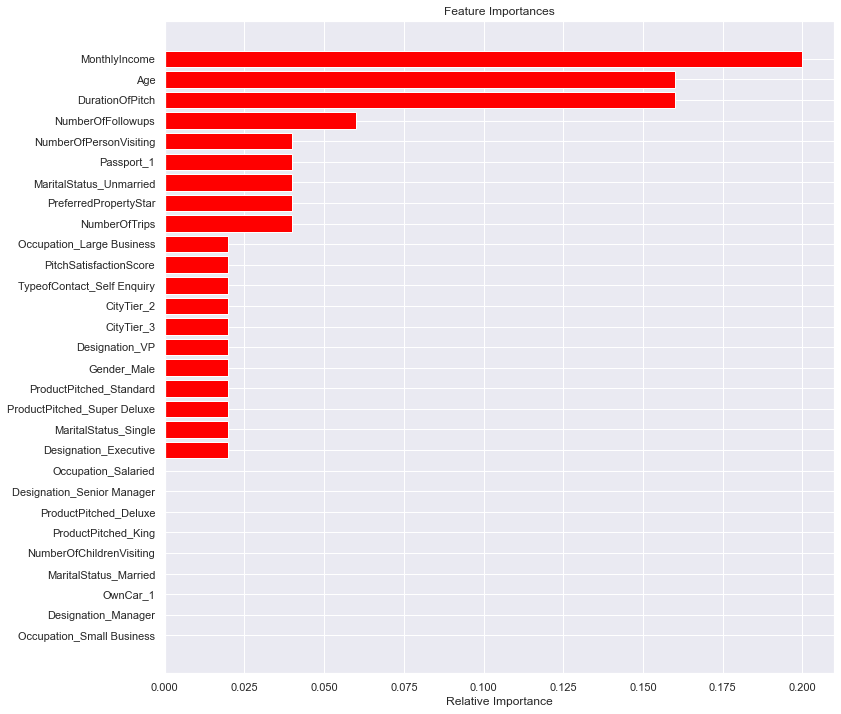

<IPython.core.display.Javascript object>

In [68]:
importances = ada.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="red", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- The model predicts that MonthlyIncome, Age, and DurationOfPitch are the most important variables.

#### Gradient Boosting Classifier

In [69]:
grad = GradientBoostingClassifier(random_state=1)
grad.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [70]:
grad_score = get_metrics_score(grad)

Accuracy on training set :  0.8877521192633733
Accuracy on test set :  0.8520790729379687
Recall on training set :  0.46794871794871795
Recall on test set :  0.35135135135135137
Precision on training set :  0.8488372093023255
Precision on test set :  0.8062015503875969


<IPython.core.display.Javascript object>

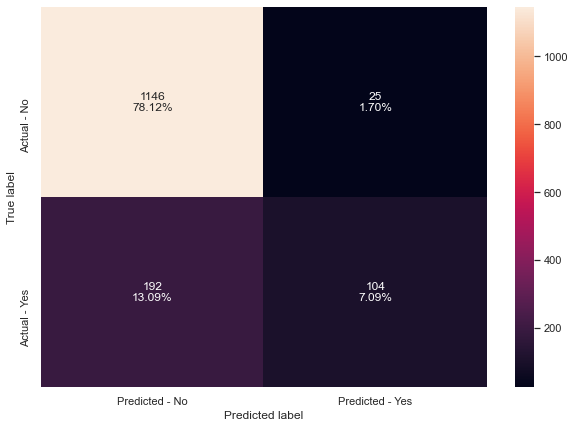

<IPython.core.display.Javascript object>

In [71]:
make_confusion_matrix(grad, y_test)

- There is a slight improvement in all the metrics in this model in comparison to the adaboost model.
- However, there is still overfitting, and the model is able to correctly identify possible buyers 7.09% of the time.

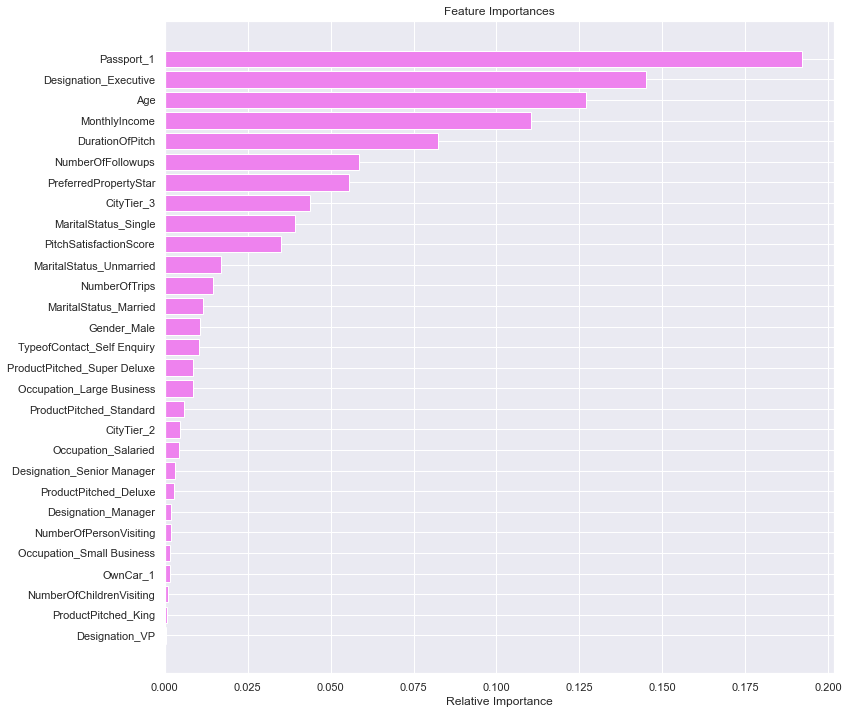

<IPython.core.display.Javascript object>

In [72]:
importances = grad.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Passport_1, Designation_executive, Age, MonthlyIncome, and DurationOfPitch are the most important variables.

#### XGBoost

In [73]:
xgb = XGBClassifier(random_state=1, eval_metric="logloss")
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

In [74]:
xgb_score = get_metrics_score(xgb)

Accuracy on training set :  0.9997076878105817
Accuracy on test set :  0.9311520109066121
Recall on training set :  0.9983974358974359
Recall on test set :  0.7027027027027027
Precision on training set :  1.0
Precision on test set :  0.9411764705882353


<IPython.core.display.Javascript object>

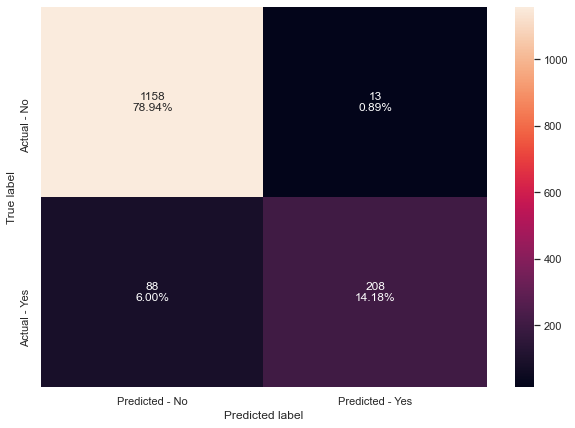

<IPython.core.display.Javascript object>

In [75]:
make_confusion_matrix(xgb, y_test)

- This model performs the best of the three models.
- The model is able to correctly identify buyers 14.18% of the time.
- However, there is still an overfit which we will try to take care of in the subsequent section.

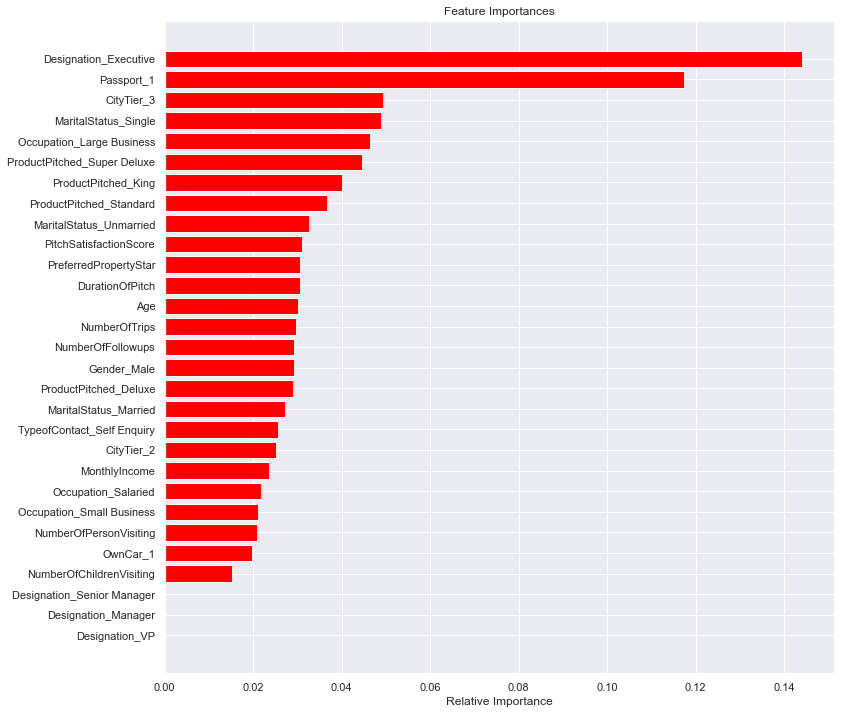

<IPython.core.display.Javascript object>

In [76]:
importances = xgb.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="red", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- For this model, Designation_executive and Passport_1 are the most important variables.

#### Hyperparameter Tuning


#### AdaBoost Tuning

In [77]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1),
        DecisionTreeClassifier(max_depth=2),
        DecisionTreeClassifier(max_depth=3),
    ],
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": np.arange(0.1, 2, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=1.8000000000000003, n_estimators=90,
                   random_state=1)

<IPython.core.display.Javascript object>

In [78]:
abc_tuned_score = get_metrics_score(abc_tuned)

Accuracy on training set :  0.9710610932475884
Accuracy on test set :  0.8548057259713702
Recall on training set :  0.907051282051282
Recall on test set :  0.5844594594594594
Precision on training set :  0.9324546952224053
Precision on test set :  0.6577946768060836


<IPython.core.display.Javascript object>

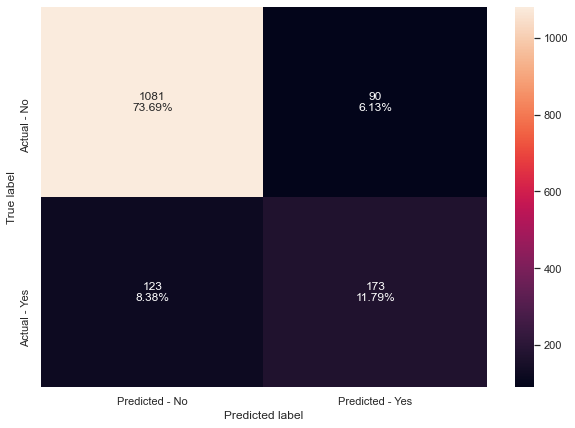

<IPython.core.display.Javascript object>

In [79]:
make_confusion_matrix(abc_tuned, y_test)

- The model performance has improved significantly after tuning. However, there is still overfitting.
- According to the test recall, the model has gotten better at identifying buyers, but still not sufficiently.

#### Feature Importance

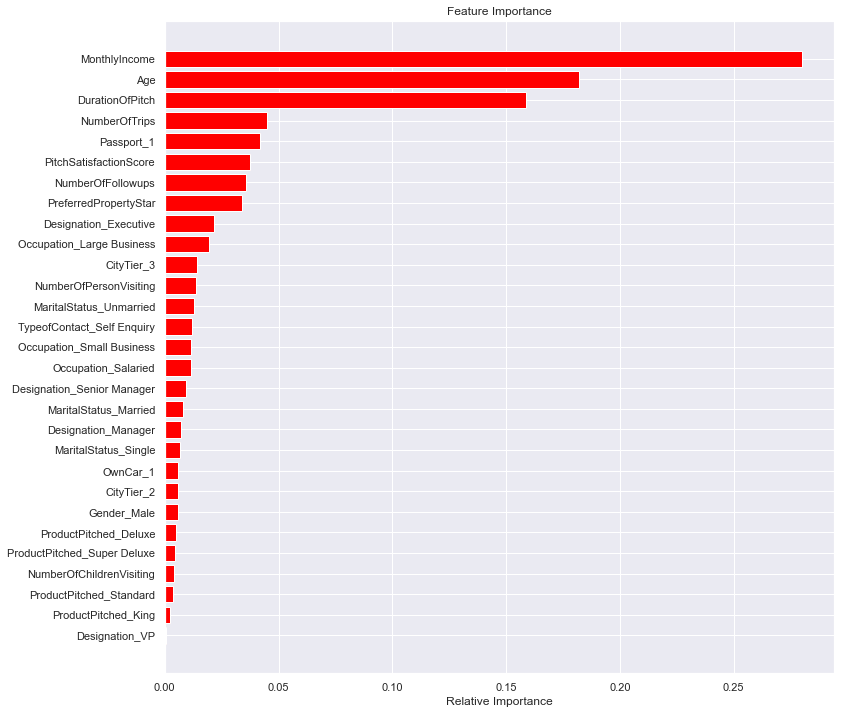

<IPython.core.display.Javascript object>

In [80]:
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importance")
plt.barh(range(len(indices)), importances[indices], color="red", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- The model predicts that MonthlyIncome, Age, and DurationOfPitch are the most important variables in determining whether a customer will take the product or not.

#### Gradient Boosting Tuned

In [81]:
gbc_init = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)
gbc_init.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

<IPython.core.display.Javascript object>

In [82]:
gbc_init_score = get_metrics_score(gbc_init)

Accuracy on training set :  0.8862905583162818
Accuracy on test set :  0.8500340831629175
Recall on training set :  0.46474358974358976
Recall on test set :  0.34121621621621623
Precision on training set :  0.8405797101449275
Precision on test set :  0.8015873015873016


<IPython.core.display.Javascript object>

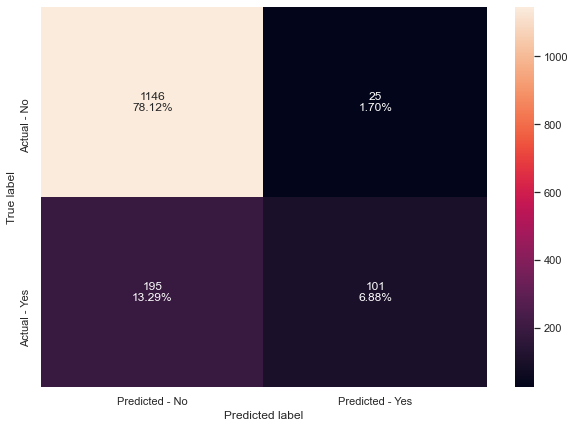

<IPython.core.display.Javascript object>

In [83]:
make_confusion_matrix(gbc_init, y_test)

- Gradient Boosting with AdaBoost as the initial classifier overfits on the test data. It is still not good at identifying buyers.

In [84]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100, 150, 200, 250],
    "subsample": [0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=250, random_state=1,
                           subsample=0.8)

<IPython.core.display.Javascript object>

In [85]:
gbc_tuned_score = get_metrics_score(gbc_tuned)

Accuracy on training set :  0.9257527038877521
Accuracy on test set :  0.8759372869802318
Recall on training set :  0.6458333333333334
Recall on test set :  0.46283783783783783
Precision on training set :  0.9243119266055045
Precision on test set :  0.85625


<IPython.core.display.Javascript object>

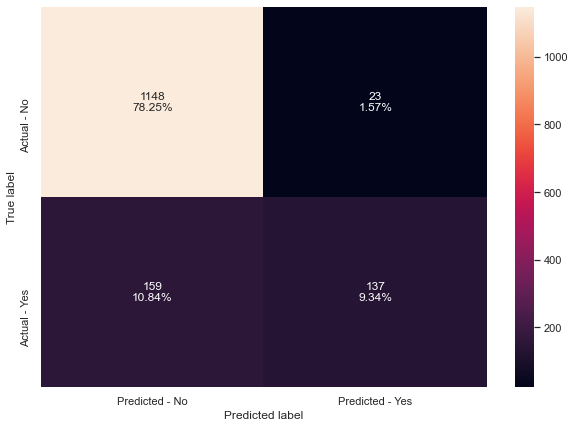

<IPython.core.display.Javascript object>

In [86]:
make_confusion_matrix(gbc_tuned, y_test)

- Generally, the metrics have improved, but the model still overfits.
- However, it still has a low recall score on the test data.

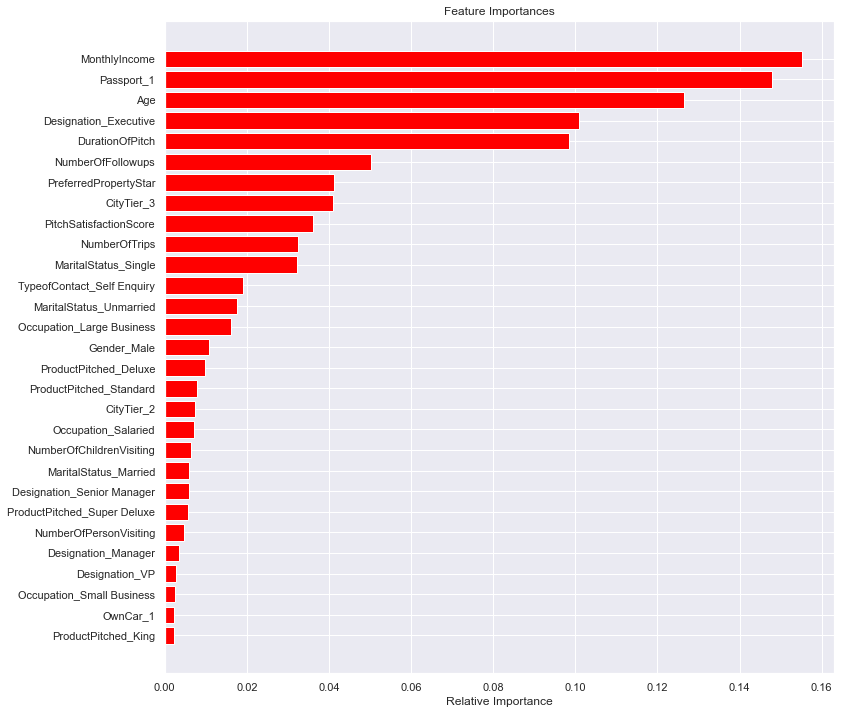

<IPython.core.display.Javascript object>

In [87]:
# importances
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="red", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- The model predicts that MonthlyIncome, Passport_1, Age, Designation_Executive, and DurationOfPitch are the most important variables in determining whether a product will be taken or not.

In [88]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": np.arange(10, 100, 20),
    "scale_pos_weight": [0, 1, 2, 5],
    "subsample": [0.5, 0.7, 0.9, 1],
    "learning_rate": [0.01, 0.1, 0.2, 0.05],
    "gamma": [0, 1, 3],
    "colsample_bytree": [0.5, 0.7, 0.9, 1],
    "colsample_bylevel": [0.5, 0.7, 0.9, 1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=4,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=5, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

In [89]:
xgb_tuned_score = get_metrics_score(xgb_tuned)

Accuracy on training set :  0.9277988892136803
Accuracy on test set :  0.8677573278800272
Recall on training set :  0.9551282051282052
Recall on test set :  0.7837837837837838
Precision on training set :  0.7312883435582822
Precision on test set :  0.6408839779005525


<IPython.core.display.Javascript object>

- There is still overfitting in the data, but the model performance has improved.The test set has a higher recall than before.

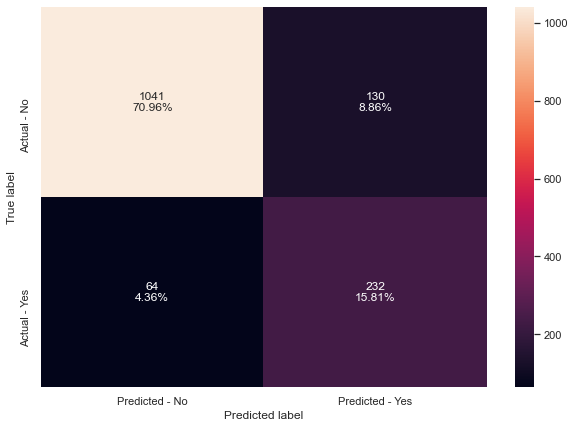

<IPython.core.display.Javascript object>

In [90]:
make_confusion_matrix(xgb_tuned, y_test)

- The model is now able to correctly identify the buyers 15.81% of the time.

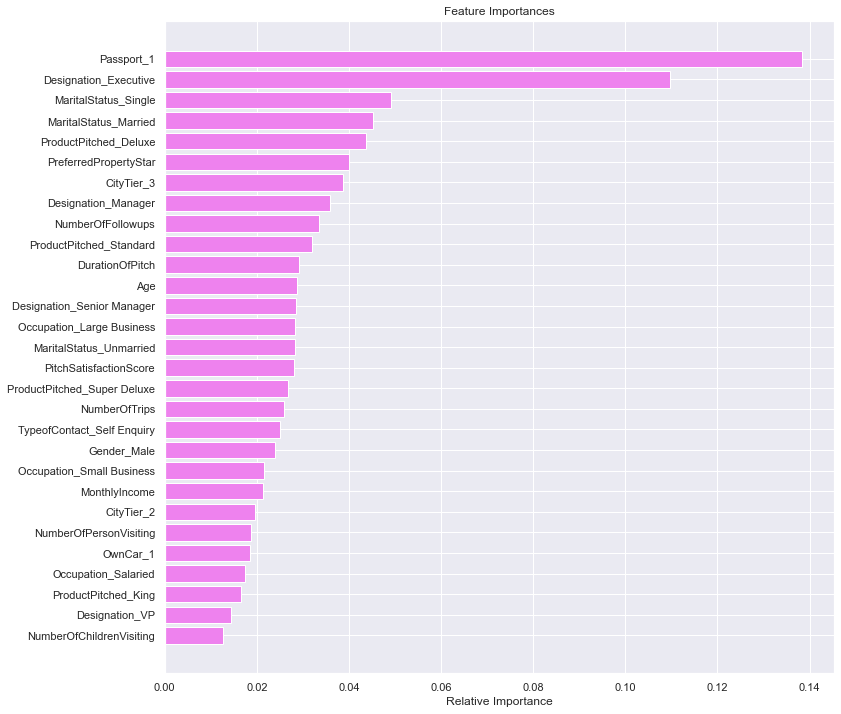

<IPython.core.display.Javascript object>

In [91]:
# Importance
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Passport_1 and Designation_executive are the most important variables for predicting product taken or not.

#### Model Comparison

In [92]:
# defining list of models
models = [ada, abc_tuned, grad, gbc_init, gbc_tuned, xgb, xgb_tuned]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model, False)
    acc_train.append(np.round(j[0], 2))
    acc_test.append(np.round(j[1], 2))
    recall_train.append(np.round(j[2], 2))
    recall_test.append(np.round(j[3], 2))
    precision_train.append(np.round(j[4], 2))
    precision_test.append(np.round(j[5], 2))

<IPython.core.display.Javascript object>

In [93]:
comparison_frame = pd.DataFrame(
    {
        "Model": [
            "AdaBoost with default paramters",
            "AdaBoost Tuned",
            "Gradient Boosting with default parameters",
            "Gradient Boosting with init=AdaBoost",
            "Gradient Boosting Tuned",
            "XGBoost with default parameters",
            "XGBoost Tuned",
        ],
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
    }
)
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,AdaBoost with default paramters,0.85,0.83,0.33,0.27,0.68,0.70
1,AdaBoost Tuned,0.97,0.85,0.91,0.58,0.93,0.66
2,Gradient Boosting with default parameters,0.89,0.85,0.47,0.35,0.85,0.81
3,Gradient Boosting with init=AdaBoost,0.89,0.85,0.46,0.34,0.84,0.80
4,Gradient Boosting Tuned,0.93,0.88,0.65,0.46,0.92,0.86
5,XGBoost with default parameters,1.00,0.93,1.00,0.70,1.00,0.94
6,XGBoost Tuned,0.93,0.87,0.96,0.78,0.73,0.64


<IPython.core.display.Javascript object>

- In a general sense, the models seem to perform better after hyperparameter tuning. However, XGBoost after tuning seems to be the better model of all models.

### Bagging Models

In [94]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    StackingClassifier,
)
from xgboost import XGBClassifier

<IPython.core.display.Javascript object>

### Decision Tree Model

In [95]:
dtree = DecisionTreeClassifier(random_state=1)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [96]:
dtree_model_train_perf = get_metrics_score(dtree)


Accuracy on training set :  1.0
Accuracy on test set :  0.9045671438309475
Recall on training set :  1.0
Recall on test set :  0.7297297297297297
Precision on training set :  1.0
Precision on test set :  0.782608695652174


<IPython.core.display.Javascript object>

- The model is overfitting on the training and testing data.

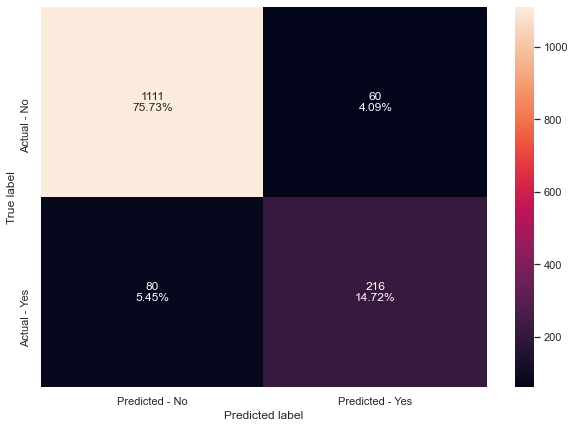

<IPython.core.display.Javascript object>

In [97]:
make_confusion_matrix(dtree, y_test)

- The model misclassified some of the customers. It is not adequately classifying the buyers and non-buyers.

#### Hyperparameter Tuning

In [98]:
# Choose the type of classifier.
dtree_tuned = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": list(np.arange(2, 20)) + [None],
    "min_samples_leaf": [1, 3, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10, 15] + [None],
    "min_impurity_decrease": [0.001, 0.01, 0.1, 0.0],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, random_state=1)

<IPython.core.display.Javascript object>

In [99]:
dtree_model_tune_perf = get_metrics_score(dtree_tuned)


Accuracy on training set :  0.9967845659163987
Accuracy on test set :  0.8950238582140423
Recall on training set :  0.9823717948717948
Recall on test set :  0.706081081081081
Precision on training set :  1.0
Precision on test set :  0.7572463768115942


<IPython.core.display.Javascript object>

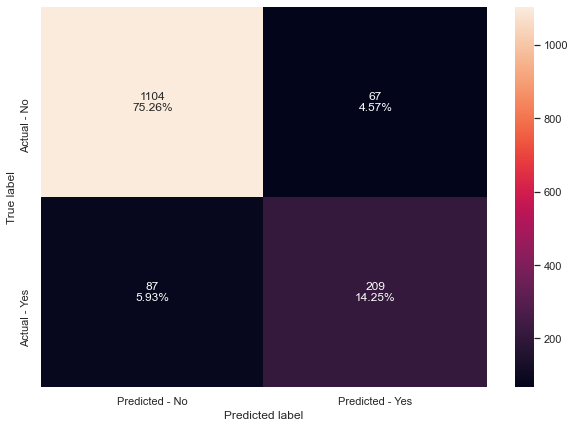

<IPython.core.display.Javascript object>

In [100]:
make_confusion_matrix(dtree_tuned, y_test)

- The model performance has not improved after tuning. There is still overfitting. In fact, the recall score has reduced slightly.

#### Feature Importance

In [101]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        dtree_tuned.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                  Imp
DurationOfPitch              0.128810
Age                          0.123185
MonthlyIncome                0.106455
Passport_1                   0.079984
Designation_Executive        0.076321
PitchSatisfactionScore       0.075882
NumberOfTrips                0.055396
NumberOfFollowups            0.054436
CityTier_3                   0.039728
PreferredPropertyStar        0.037976
TypeofContact_Self Enquiry   0.028084
MaritalStatus_Single         0.027276
Occupation_Small Business    0.020539
OwnCar_1                     0.020536
NumberOfChildrenVisiting     0.016815
MaritalStatus_Married        0.015225
Occupation_Large Business    0.015070
MaritalStatus_Unmarried      0.014441
Gender_Male                  0.013866
NumberOfPersonVisiting       0.010850
Designation_Manager          0.009611
CityTier_2                   0.009022
ProductPitched_Deluxe        0.008648
ProductPitched_Super Deluxe  0.004955
ProductPitched_Standard      0.003222
ProductPitch

<IPython.core.display.Javascript object>

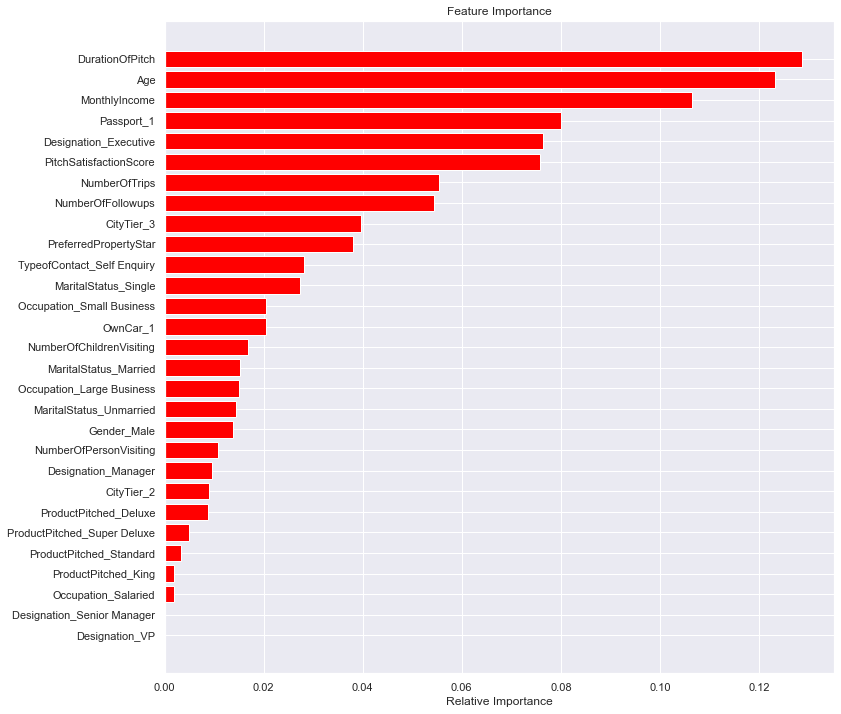

<IPython.core.display.Javascript object>

In [102]:
feature_names = X_train.columns
importances = dtree_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importance")
plt.barh(range(len(indices)), importances[indices], color="red", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Passport_1 and Designation_Executive are the most important variables.

### Random Forest Model

In [103]:
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [104]:
rf_estimator_model_train_perf = get_metrics_score(rf_estimator)


Accuracy on training set :  1.0
Accuracy on test set :  0.9059304703476483
Recall on training set :  1.0
Recall on test set :  0.5608108108108109
Precision on training set :  1.0
Precision on test set :  0.9540229885057471


<IPython.core.display.Javascript object>

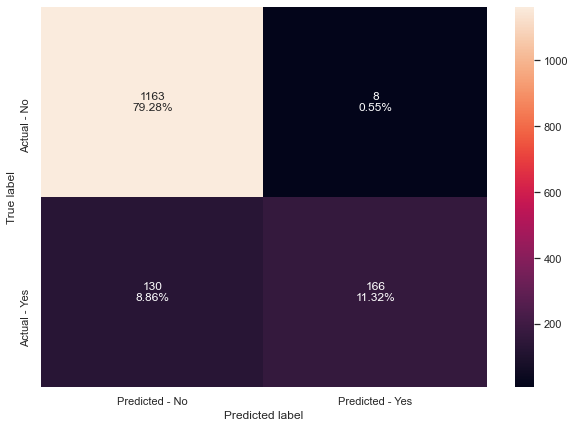

<IPython.core.display.Javascript object>

In [105]:
make_confusion_matrix(rf_estimator, y_test)

- There is overfitting in the model. Let's see if that can be improved after hyperparameter tuning.

#### Hyperparameter Tuning

In [106]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": list(np.arange(5, 25, 5)) + [None],
    "max_features": ["sqrt", "log2", None],
    "min_samples_leaf": np.arange(5, 11, 1),
    "min_samples_split": np.arange(2, 20, 5),
    "n_estimators": np.arange(10, 60, 5),
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, max_features=None, min_samples_leaf=5,
                       n_estimators=25, random_state=1)

<IPython.core.display.Javascript object>

In [107]:
rf_tuned_model_train_perf = get_metrics_score(rf_tuned)


Accuracy on training set :  0.9444606840105232
Accuracy on test set :  0.8643490115882754
Recall on training set :  0.7275641025641025
Recall on test set :  0.4358108108108108
Precision on training set :  0.9578059071729957
Precision on test set :  0.8012422360248447


<IPython.core.display.Javascript object>

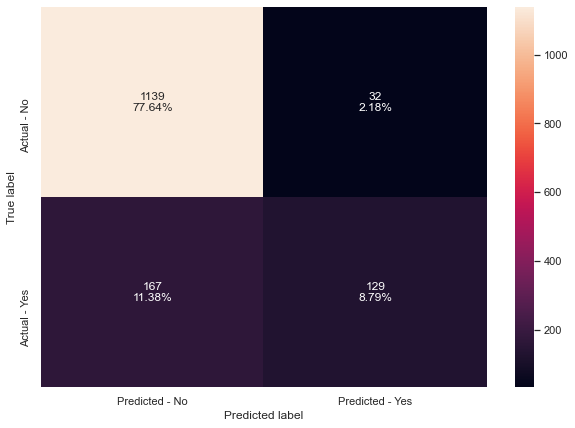

<IPython.core.display.Javascript object>

In [108]:
make_confusion_matrix(rf_tuned, y_test)

- There is still overfitting in the model. The model's recall score has reduced. That means the model is not successfully identifying the package buyers.

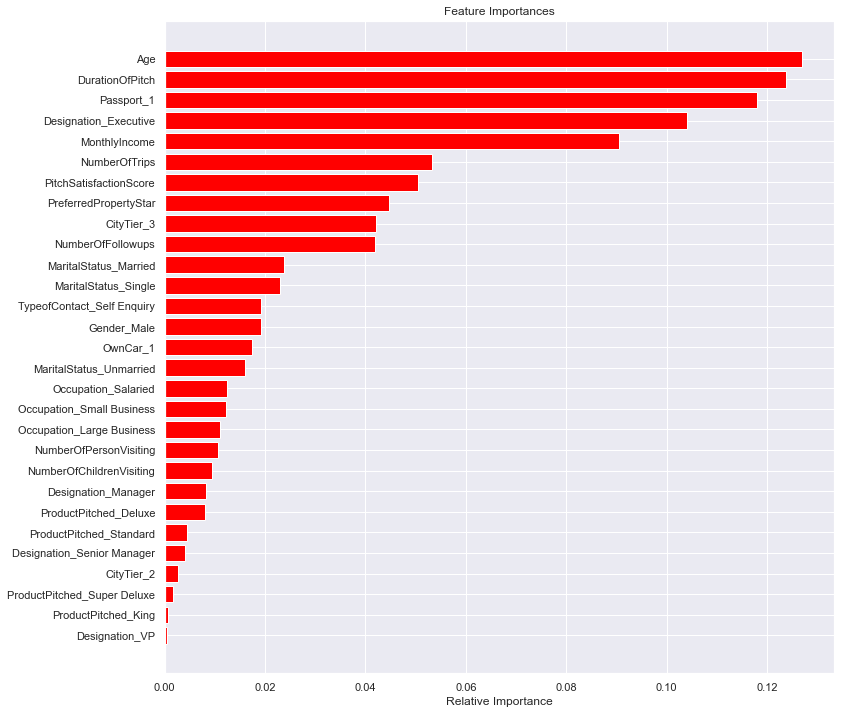

<IPython.core.display.Javascript object>

In [109]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="red", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- The model predicts that Age, DurationOfPitch, Passport_1, Designation_Executive, and MonthlyIncome are the most important variables.

In [110]:
from sklearn.ensemble import StackingClassifier

<IPython.core.display.Javascript object>

### Stacking Model

In [111]:
estimators = [
    ("Decision Tree", dtree_tuned),
    ("Random Forest", rf_tuned),
    ("Gradient Boosting", gbc_tuned),
]
final_estimator = XGBClassifier(random_state=1, eval_metric="logloss")

<IPython.core.display.Javascript object>

In [112]:
stacking_estimator = StackingClassifier(
    estimators=estimators, final_estimator=final_estimator, cv=5
)
stacking_estimator.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('Decision Tree',
                                DecisionTreeClassifier(max_depth=15,
                                                       random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(max_depth=15,
                                                       max_features=None,
                                                       min_samples_leaf=5,
                                                       n_estimators=25,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.8,
                                                           n_estimators=250,
                                                           ra...


<IPython.core.display.Javascript object>

In [113]:
stacking_estimator_model_train_perf = get_metrics_score(stacking_estimator)


Accuracy on training set :  0.9672610347851506
Accuracy on test set :  0.8991138377641446
Recall on training set :  0.8733974358974359
Recall on test set :  0.6317567567567568
Precision on training set :  0.9429065743944637
Precision on test set :  0.827433628318584


<IPython.core.display.Javascript object>

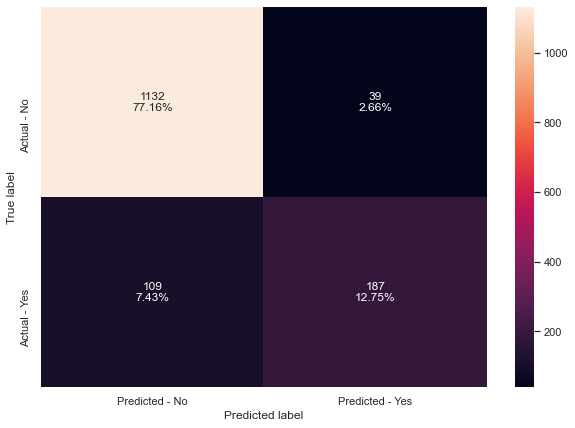

<IPython.core.display.Javascript object>

In [114]:
make_confusion_matrix(stacking_estimator, y_test)

- The model is still overfitting. However, there is a notable improvement in the recall scores.

### Model Comparison

In [115]:
# defining list of models
models2 = [dtree, dtree_tuned, rf_estimator, rf_tuned, stacking_estimator]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models2:
    j = get_metrics_score(model, False)
    acc_train.append(np.round(j[0], 2))
    acc_test.append(np.round(j[1], 2))
    recall_train.append(np.round(j[2], 2))
    recall_test.append(np.round(j[3], 2))
    precision_train.append(np.round(j[4], 2))
    precision_test.append(np.round(j[5], 2))

<IPython.core.display.Javascript object>

In [116]:
comparison_frame2 = pd.DataFrame(
    {
        "Model": [
            "DecisionTree with default parameters",
            "DecisionTree Tuned",
            "RandomForest with default parameters",
            "RandomForest Tuned",
            "Stacking with Tuned models",
        ],
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
    }
)
comparison_frame2

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,DecisionTree with default parameters,1.00,0.90,1.00,0.73,1.00,0.78
1,DecisionTree Tuned,1.00,0.90,0.98,0.71,1.00,0.76
2,RandomForest with default parameters,1.00,0.91,1.00,0.56,1.00,0.95
3,RandomForest Tuned,0.94,0.86,0.73,0.44,0.96,0.80
4,Stacking with Tuned models,0.97,0.90,0.87,0.63,0.94,0.83


<IPython.core.display.Javascript object>

- Despite the models' poor performance, the decision tree models seem to have perfomed better in comparison to the other models. There is, however, still overfitting in the models.

### Insights and Recommendations

- Despite the models’ varying scores some interpretations can still be made.
- For instance, after hyperparameter tuning, there are variables that were frequent in the models. 
- - Having a Monthly Income is important with regards to purchasing one of the packages. However, contrary to what one would expect, the EDA illustrated that people with higher income tend not to purchase the packages. These products need to be made attractive to people with higher income, who are likely to spend more money with the company.
- - Age is also an important variable. There is a small difference, but more younger people than older purchase the wellness packages. In as much as everyone should be taking care of their health, having great health is more of a concern to older people. Therefore, the packages should make sure to be inclusive of older people by making the packages attractive to everyone.
- - Having a passport is another important variable. These are individuals that could travel outside of the country in case whatever is available in the country is not sufficient. The company could open facilities outside the country or get into a partnership with other companies outside the country.
- - DurationOfPitch is also a frequent important variable. According to the EDA, the longer pitches had more successful sales than the shorter ones. The company should train their salespeople how to keep the customer interested in their products long enough for a sale to be made.
- - Additionally, the EDA revealed that the products could be tailored to specific individuals such as couples, teenagers, or young families, i.e., families with only one child.
- - As there is a divide in the tiers, different packages can be made available depending on the region the customers are in.


**- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -**